# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
os.getcwd()
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
?MCSimulation


Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("ALPACA.env")


True

In [4]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#alpaca_api_key = 
#alpaca_secret_key = 


In [5]:
display(type(alpaca_api_key))


str

In [6]:
display(type(alpaca_secret_key))


str

In [7]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)



## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [8]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [9]:
# The monthly amount for the member's household income
# YOUR CODE HERE

monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [10]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [11]:
# Using the Python requests library, make an API call to access the current price of BTC
#btc_response = # YOUR CODE HERE

btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

print(json.dumps(btc_response, indent=4, sort_keys=True))




{
    "data": {
        "1": {
            "circulating_supply": 19022231,
            "id": 1,
            "last_updated": 1650926280,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 765511649170,
                    "percent_change_1h": 0.334833047105721,
                    "percent_change_24h": 1.43652359478881,
                    "percent_change_7d": 1.36249000772008,
                    "percentage_change_1h": 0.334833047105721,
                    "percentage_change_24h": 1.43652359478881,
                    "percentage_change_7d": 1.36249000772008,
                    "price": 40281.0,
                    "volume_24h": 32217266790
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19022231,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [12]:
# Using the Python requests library, make an API call to access the current price ETH
#eth_response = # YOUR CODE HERE

eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120527687,
            "id": 1027,
            "last_updated": 1650926264,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 363091556426,
                    "percent_change_1h": 0.358744613486002,
                    "percent_change_24h": 2.31907351221993,
                    "percent_change_7d": 0.50862345070412,
                    "percentage_change_1h": 0.358744613486002,
                    "percentage_change_24h": 2.31907351221993,
                    "percentage_change_7d": 0.50862345070412,
                    "price": 3010.96,
                    "volume_24h": 21860159683
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120527687,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [13]:
# Navigate the BTC response object to access the current price of BTC
# btc_price = # YOUR CODE HERE

btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
# YOUR CODE HERE

print(f'The current price of BTC is: ${btc_price}')
     

The current price of BTC is: $40281.0


In [14]:
# Navigate the BTC response object to access the current price of ETH
#eth_pri ce = # YOUR CODE HERE

eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
# YOUR CODE HERE

print(f'The current price of ETH is: ${eth_price}')


The current price of ETH is: $3010.96


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [15]:
# Compute the current value of the BTC holding 
# btc_value = # YOUR CODE HERE

btc_value = (btc_price) * (btc_coins)

# Print current value of your holding in BTC
# YOUR CODE HERE

print(f'The current value of the BTC holding is: ${btc_value:.2f}')



The current value of the BTC holding is: $48337.20


In [58]:
# Compute the current value of the ETH holding 
# eth_value = # YOUR CODE HERE

eth_value = (eth_price) * (eth_coins)

# Print current value of your holding in ETH
# YOUR CODE HERE

print(f'The current value of the ETH holding is: ${eth_value:.2f}')


The current value of the ETH holding is: $15958.09


In [17]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
# total_crypto_wallet = # YOUR CODE HERE

total_crypto_wallet = (btc_value) + (eth_value)

# Print current cryptocurrency wallet balance
# YOUR CODE HERE

print(f'The current total value of the crypto wallet is: ${total_crypto_wallet:.2f}')
      


The current total value of the crypto wallet is: $64295.29


In [137]:
total_crypto_wallet


64295.288

In [138]:
crypto = total_crypto_wallet

crypto


64295.288

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [18]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [19]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE

## these were set above

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [20]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE

tickers= ['SPY','AGG']

# Set timeframe to 1Day
# YOUR CODE HERE


timeframe= '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE

start_date= pd.Timestamp('2020-08-07', tz= 'America/New_York').isoformat()

end_date= pd.Timestamp('2020-08-14', tz= 'America/New_York').isoformat()



In [21]:
portfolio_1 = alpaca.get_bars(
    tickers,timeframe,start_date,end_date
).df


In [22]:
portfolio_1


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.7300,119.3950,119.43,5559066,15246,119.475306,AGG
2020-08-10 04:00:00+00:00,119.62,119.6350,119.2800,119.32,5152701,16680,119.403983,AGG
2020-08-11 04:00:00+00:00,119.11,119.2100,118.8400,118.99,7809897,19839,118.963269,AGG
2020-08-12 04:00:00+00:00,118.73,118.8900,118.6500,118.75,5524629,16150,118.765101,AGG
2020-08-13 04:00:00+00:00,118.77,118.7800,118.2400,118.31,8024370,24612,118.442935,AGG
2020-08-14 04:00:00+00:00,118.43,118.4900,118.2000,118.20,4556476,13664,118.339293,AGG
2020-08-07 04:00:00+00:00,333.29,334.8800,332.3000,334.57,57282821,350100,333.800372,SPY
2020-08-10 04:00:00+00:00,335.00,335.7700,332.9550,335.57,46010808,284608,335.006397,SPY
2020-08-11 04:00:00+00:00,336.86,337.5400,332.0100,332.80,69601087,385851,335.212188,SPY


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [23]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
portfolio_1 = alpaca.get_bars(
    tickers,
    timeframe,
    start= start_date,
    end= end_date
).df



# Reorganize the DataFrame
# Seprate ticker data
# YOUR CODE HERE

spy = portfolio_1[portfolio_1['symbol']=='SPY'].drop('symbol',axis=1)

agg = portfolio_1[portfolio_1['symbol']=='AGG'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE

portfolio_1_combined = pd.concat([spy,agg],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE

portfolio_1_combined.head()



SPY                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-08-07 04:00:00+00:00  333.29  334.8800  332.3000  334.57  57282821   
2020-08-10 04:00:00+00:00  335.00  335.7700  332.9550  335.57  46010808   
2020-08-11 04:00:00+00:00  336.86  337.5400  332.0100  332.80  69601087   
2020-08-12 04:00:00+00:00  335.47  338.2800  332.8377  337.44  53914841   
2020-08-13 04:00:00+00:00  336.58  338.2514  335.8300  336.83  41819943   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.730  119.395   
2020-08-10 04:00:00+00:00      284608  335.006397  119.62  119.635  119.280   
2020-08-11 04:00:00+00:00      385851  335.212188  119.11  119.210  118.840   
2020-08-12 04:00:00+00:00      312589  336.715356  118.73  118.890  118.650   
2020-08-13 04:00:00+00:00      278290  337.208390  118.77  118.780  118.240   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306  
2020-08-10 04:00:00+00:00  119.32  5152701       16680  119.403983  
2020-08-11 04:00:00+00:00  118.99  7809897       19839  118.963269  
2020-08-12 04:00:00+00:00  118.75  5524629       16150  118.765101  
2020-08-13 04:00:00+00:00  118.31  8024370       24612  118.442935

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [24]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
# agg_close_price = # YOUR CODE HERE

# Print the AGG closing price
# YOUR CODE HERE




agg_close_price = (portfolio_1_combined['AGG']['close'])



agg_close_price.head()


timestamp
2020-08-07 04:00:00+00:00    119.43
2020-08-10 04:00:00+00:00    119.32
2020-08-11 04:00:00+00:00    118.99
2020-08-12 04:00:00+00:00    118.75
2020-08-13 04:00:00+00:00    118.31
Name: close, dtype: float64

In [25]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
#spy_close_price = # YOUR CODE HERE

# Print the SPY closing price
# YOUR CODE HERE

spy_close_price = portfolio_1_combined['SPY']['close']

spy_close_price.head()



timestamp
2020-08-07 04:00:00+00:00    334.57
2020-08-10 04:00:00+00:00    335.57
2020-08-11 04:00:00+00:00    332.80
2020-08-12 04:00:00+00:00    337.44
2020-08-13 04:00:00+00:00    336.83
Name: close, dtype: float64

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [26]:
# Calculate the current value of the bond portion of the portfolio
# agg_value = # YOUR CODE HERE

# agg_value = agg_close_price * portfolio_1_combined.loc['AGG']['agg_shares']


agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE
agg_value.head()


timestamp
2020-08-07 04:00:00+00:00    23886.0
2020-08-10 04:00:00+00:00    23864.0
2020-08-11 04:00:00+00:00    23798.0
2020-08-12 04:00:00+00:00    23750.0
2020-08-13 04:00:00+00:00    23662.0
Name: close, dtype: float64

In [27]:
# Calculate the current value of the stock portion of the portfolio
# spy_value = # YOUR CODE HERE

spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
# YOUR CODE HERE

spy_value.head()


timestamp
2020-08-07 04:00:00+00:00    36802.7
2020-08-10 04:00:00+00:00    36912.7
2020-08-11 04:00:00+00:00    36608.0
2020-08-12 04:00:00+00:00    37118.4
2020-08-13 04:00:00+00:00    37051.3
Name: close, dtype: float64

In [28]:
# Calculate the total value of the stock and bond portion of the portfolio
# total_stocks_bonds = # YOUR CODE HERE

total_stock_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE

total_stock_bonds.head()




timestamp
2020-08-07 04:00:00+00:00    60688.7
2020-08-10 04:00:00+00:00    60776.7
2020-08-11 04:00:00+00:00    60406.0
2020-08-12 04:00:00+00:00    60868.4
2020-08-13 04:00:00+00:00    60713.3
Name: close, dtype: float64

In [29]:
total_stock_sb = total_stock_bonds[:1]

total_stock_sb


timestamp
2020-08-07 04:00:00+00:00    60688.7
Name: close, dtype: float64

In [30]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
# total_portfolio = # YOUR CODE HERE

total_portfolio = total_stock_sb + total_crypto_wallet


# YOUR CODE HERE

total_portfolio



#print(f'The current total value of the portfolio is: ${total_portfolio}')


timestamp
2020-08-07 04:00:00+00:00    124983.988
Name: close, dtype: float64

In [60]:
tickers= ['SPY','AGG']

# Set timeframe to 1Day
# YOUR CODE HERE


timeframe= '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE

start_date= pd.Timestamp('2020-08-07', tz= 'America/New_York').isoformat()

end_date= pd.Timestamp('2020-08-07', tz= 'America/New_York').isoformat()


In [117]:
portfolio_8_df = alpaca.get_bars(
    tickers,timeframe,start_date,end_date
).df

portfolio_8_df


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG
2020-08-07 04:00:00+00:00,333.29,334.88,332.300,334.57,57282821,350100,333.800372,SPY


In [119]:
AGG = portfolio_8_df[portfolio_8_df['symbol']=='AGG'].drop('symbol',axis=1)

SPY = portfolio_8_df[portfolio_8_df['symbol']=='SPY'].drop('symbol',axis=1)



In [120]:
portfolio_8_df



,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG
2020-08-07 04:00:00+00:00,333.29,334.88,332.300,334.57,57282821,350100,333.800372,SPY


In [121]:
portfolio_8_df = pd.concat([AGG, SPY], axis=1, keys = ['AGG', 'SPY'])

portfolio_8_df


AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.29  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [126]:
agg_price = float(portfolio_8_df['AGG']['close'])

agg_price

                                       

119.43

In [127]:
print(type(agg_price))


<class 'float'>


In [123]:
spy_price = float(portfolio_8_df['SPY']['close'])

spy_price



334.57

In [128]:
print(type(spy_price))


<class 'float'>


In [129]:
agg_value = agg_price * agg_shares

agg_value


23886.0

In [132]:

spy_value = spy_price * spy_shares

spy_value


36802.7

In [133]:

pie_values_df = pd.DataFrame(
    {'Value':[agg_value, spy_value]},
    index=['AGG', 'SPY'])

pie_values_df



,Value
AGG,23886.0
SPY,36802.7


<AxesSubplot:title={'center':'Savings Data - 8/7/2020'}, ylabel='Value'>

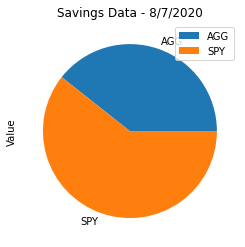

In [134]:

pie_values_df.plot.pie(y='Value', title= 'Savings Data - 8/7/2020')



In [136]:

total_crypto_wallet


64295.288

In [144]:
savings_df = pd.DataFrame(
    {'Amount':[agg_value, spy_value, crypto]},
    index=['AGG', 'SPY', 'Crypto'])

pie_values_df


,Value
AGG,23886.000
SPY,36802.700
Crypto,64295.288


<AxesSubplot:title={'center':'Savings Data - 8/7/2020'}, ylabel='Amount'>

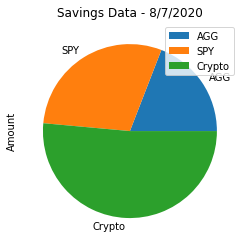

In [145]:

savings_df.plot.pie(y='Amount', title= 'Savings Data - 8/7/2020')


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [135]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE




# Review the Python list savings_data
# YOUR CODE HERE



# SEE ABOVE

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [32]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE

# Display the savings_df DataFrame
# YOUR CODE HERE

# SEE ABOVE

#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

In [33]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE


# SEE ABOVE

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [147]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE

monthly_income = 12000

emergency_fund_value = monthly_income * 3

emergency_fund_value


36000

In [150]:
portfolio_value = agg_value + spy_value + crypto

portfolio_value


124983.988

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [155]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE

if portfolio_value > emergency_fund_value
    print("Congratulations! You have enough money in this fund. $", portfolio_value)
    if portfolio_value == emergency_fund_value
        print("Congratulations! You have reached this important financial goal. $", emergency_fund_value)
    elif portfolio_value < emergency_fund_value
        print("You are this far away from reaching your goal! $", emergency_fund_value - portfolio_value)
        



SyntaxError: invalid syntax (2355433537.py, line 6)

## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [36]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE
start_date= pd.Timestamp('2018-08-07', tz= 'America/New_York').isoformat()

end_date= pd.Timestamp('2020-08-07', tz= 'America/New_York').isoformat()



portfolio_2 = alpaca.get_bars(
    tickers,
    timeframe,
    start= start_date,
    end= end_date
).df


# Set number of rows to 1000 to retrieve the maximum amount of rows
# YOUR CODE HERE

In [37]:
portfolio_2


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-08-07 04:00:00+00:00,105.97,105.97,105.8250,105.85,2532774,9522,105.876672,AGG
2018-08-08 04:00:00+00:00,105.83,105.91,105.8000,105.85,1937527,9394,105.848006,AGG
2018-08-09 04:00:00+00:00,105.97,106.04,105.9329,106.00,2386756,10063,105.993103,AGG
2018-08-10 04:00:00+00:00,106.11,106.36,106.1100,106.23,4136487,12317,106.238745,AGG
2018-08-13 04:00:00+00:00,106.16,106.30,106.1501,106.29,2786308,13888,106.241962,AGG
...,...,...,...,...,...,...,...,...
2020-08-03 04:00:00+00:00,328.31,329.62,327.7300,328.79,53080454,288008,328.658804,SPY
2020-08-04 04:00:00+00:00,327.88,330.06,327.8600,330.06,41918004,250900,329.057593,SPY
2020-08-05 04:00:00+00:00,331.46,332.39,331.1800,332.11,42870955,241416,331.791643,SPY


In [38]:
portfolio_2.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-08-07 04:00:00+00:00,105.97,105.97,105.8250,105.85,2532774,9522,105.876672,AGG
2018-08-08 04:00:00+00:00,105.83,105.91,105.8000,105.85,1937527,9394,105.848006,AGG
2018-08-09 04:00:00+00:00,105.97,106.04,105.9329,106.00,2386756,10063,105.993103,AGG
2018-08-10 04:00:00+00:00,106.11,106.36,106.1100,106.23,4136487,12317,106.238745,AGG
2018-08-13 04:00:00+00:00,106.16,106.30,106.1501,106.29,2786308,13888,106.241962,AGG


In [39]:
portfolio_2.tail()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-03 04:00:00+00:00,328.31,329.62,327.73,328.79,53080454,288008,328.658804,SPY
2020-08-04 04:00:00+00:00,327.88,330.06,327.86,330.06,41918004,250900,329.057593,SPY
2020-08-05 04:00:00+00:00,331.46,332.39,331.18,332.11,42870955,241416,331.791643,SPY
2020-08-06 04:00:00+00:00,331.52,334.46,331.13,334.33,43745653,290039,332.937218,SPY
2020-08-07 04:00:00+00:00,333.29,334.88,332.30,334.57,57282821,350100,333.800372,SPY


In [40]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE



# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

spy = portfolio_2[portfolio_2['symbol']=='SPY'].drop('symbol',axis=1)

agg = portfolio_2[portfolio_2['symbol']=='AGG'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE

portfolio_2_combined = pd.concat([spy,agg],axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE

portfolio_2_combined


SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2018-08-07 04:00:00+00:00  285.40  286.010  285.240  285.58  43427090   
2018-08-08 04:00:00+00:00  285.39  285.910  284.940  285.46  42273966   
2018-08-09 04:00:00+00:00  285.54  285.970  284.915  285.07  37130583   
2018-08-10 04:00:00+00:00  283.42  284.055  282.360  283.16  77399449   
2018-08-13 04:00:00+00:00  283.49  284.160  281.770  282.10  65970064   
...                           ...      ...      ...     ...       ...   
2020-08-03 04:00:00+00:00  328.31  329.620  327.730  328.79  53080454   
2020-08-04 04:00:00+00:00  327.88  330.060  327.860  330.06  41918004   
2020-08-05 04:00:00+00:00  331.46  332.390  331.180  332.11  42870955   
2020-08-06 04:00:00+00:00  331.52  334.460  331.130  334.33  43745653   
2020-08-07 04:00:00+00:00  333.29  334.880  332.300  334.57  57282821   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-08-07 04:00:00+00:00      181015  285.635439  105.97  105.97  105.8250   
2018-08-08 04:00:00+00:00      154349  285.479104  105.83  105.91  105.8000   
2018-08-09 04:00:00+00:00      140980  285.455348  105.97  106.04  105.9329   
2018-08-10 04:00:00+00:00      292690  283.350560  106.11  106.36  106.1100   
2018-08-13 04:00:00+00:00      270772  282.691061  106.16  106.30  106.1501   
...                               ...         ...     ...     ...       ...   
2020-08-03 04:00:00+00:00      288008  328.658804  119.37  119.40  119.1903   
2020-08-04 04:00:00+00:00      250900  329.057593  119.42  119.63  119.4200   
2020-08-05 04:00:00+00:00      241416  331.791643  119.39  119.49  119.3100   
2020-08-06 04:00:00+00:00      290039  332.937218  119.62  119.73  119.5300   
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.3950   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-08-07 04:00:00+00:00  105.85   2532774        9522  105.876672  
2018-08-08 04:00:00+00:00  105.85   1937527        9394  105.848006  
2018-08-09 04:00:00+00:00  106.00   2386756       10063  105.993103  
2018-08-10 04:00:00+00:00  106.23   4136487       12317  106.238745  
2018-08-13 04:00:00+00:00  106.29   2786308       13888  106.241962  
...                           ...       ...         ...         ...  
2020-08-03 04:00:00+00:00  119.40  13014535       36359  119.282420  
2020-08-04 04:00:00+00:00  119.63  10935181       39114  119.541666  
2020-08-05 04:00:00+00:00  119.40  17377874       42313  119.387245  
2020-08-06 04:00:00+00:00  119.57   4608710       15938  119.604199  
2020-08-07 04:00:00+00:00  119.43   5559066       15246  119.475306  

[505 rows x 14 columns]

In [41]:
portfolio_2_combined.head()


SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2018-08-07 04:00:00+00:00  285.40  286.010  285.240  285.58  43427090   
2018-08-08 04:00:00+00:00  285.39  285.910  284.940  285.46  42273966   
2018-08-09 04:00:00+00:00  285.54  285.970  284.915  285.07  37130583   
2018-08-10 04:00:00+00:00  283.42  284.055  282.360  283.16  77399449   
2018-08-13 04:00:00+00:00  283.49  284.160  281.770  282.10  65970064   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-08-07 04:00:00+00:00      181015  285.635439  105.97  105.97  105.8250   
2018-08-08 04:00:00+00:00      154349  285.479104  105.83  105.91  105.8000   
2018-08-09 04:00:00+00:00      140980  285.455348  105.97  106.04  105.9329   
2018-08-10 04:00:00+00:00      292690  283.350560  106.11  106.36  106.1100   
2018-08-13 04:00:00+00:00      270772  282.691061  106.16  106.30  106.1501   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2018-08-07 04:00:00+00:00  105.85  2532774        9522  105.876672  
2018-08-08 04:00:00+00:00  105.85  1937527        9394  105.848006  
2018-08-09 04:00:00+00:00  106.00  2386756       10063  105.993103  
2018-08-10 04:00:00+00:00  106.23  4136487       12317  106.238745  
2018-08-13 04:00:00+00:00  106.29  2786308       13888  106.241962

In [42]:
portfolio_2_combined.tail()


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2020-08-03 04:00:00+00:00  328.31  329.62  327.73  328.79  53080454   
2020-08-04 04:00:00+00:00  327.88  330.06  327.86  330.06  41918004   
2020-08-05 04:00:00+00:00  331.46  332.39  331.18  332.11  42870955   
2020-08-06 04:00:00+00:00  331.52  334.46  331.13  334.33  43745653   
2020-08-07 04:00:00+00:00  333.29  334.88  332.30  334.57  57282821   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2020-08-03 04:00:00+00:00      288008  328.658804  119.37  119.40  119.1903   
2020-08-04 04:00:00+00:00      250900  329.057593  119.42  119.63  119.4200   
2020-08-05 04:00:00+00:00      241416  331.791643  119.39  119.49  119.3100   
2020-08-06 04:00:00+00:00      290039  332.937218  119.62  119.73  119.5300   
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.3950   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00  119.40  13014535       36359  119.282420  
2020-08-04 04:00:00+00:00  119.63  10935181       39114  119.541666  
2020-08-05 04:00:00+00:00  119.40  17377874       42313  119.387245  
2020-08-06 04:00:00+00:00  119.57   4608710       15938  119.604199  
2020-08-07 04:00:00+00:00  119.43   5559066       15246  119.475306

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [43]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

mc_thirty = MCSimulation(portfolio_data = portfolio_2_combined,weights = [.60,.40],num_simulation = 500,num_trading_days = 252*30)


# Review the simulation input data
# YOUR CODE HERE

mc_thirty.portfolio_data.head()



SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2018-08-07 04:00:00+00:00  285.40  286.010  285.240  285.58  43427090   
2018-08-08 04:00:00+00:00  285.39  285.910  284.940  285.46  42273966   
2018-08-09 04:00:00+00:00  285.54  285.970  284.915  285.07  37130583   
2018-08-10 04:00:00+00:00  283.42  284.055  282.360  283.16  77399449   
2018-08-13 04:00:00+00:00  283.49  284.160  281.770  282.10  65970064   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-08-07 04:00:00+00:00      181015  285.635439          NaN  105.97   
2018-08-08 04:00:00+00:00      154349  285.479104    -0.000420  105.83   
2018-08-09 04:00:00+00:00      140980  285.455348    -0.001366  105.97   
2018-08-10 04:00:00+00:00      292690  283.350560    -0.006700  106.11   
2018-08-13 04:00:00+00:00      270772  282.691061    -0.003743  106.16   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2018-08-07 04:00:00+00:00  105.97  105.8250  105.85  2532774        9522   
2018-08-08 04:00:00+00:00  105.91  105.8000  105.85  1937527        9394   
2018-08-09 04:00:00+00:00  106.04  105.9329  106.00  2386756       10063   
2018-08-10 04:00:00+00:00  106.36  106.1100  106.23  4136487       12317   
2018-08-13 04:00:00+00:00  106.30  106.1501  106.29  2786308       13888   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-08-07 04:00:00+00:00  105.876672          NaN  
2018-08-08 04:00:00+00:00  105.848006     0.000000  
2018-08-09 04:00:00+00:00  105.993103     0.001417  
2018-08-10 04:00:00+00:00  106.238745     0.002170  
2018-08-13 04:00:00+00:00  106.241962     0.000565

In [44]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE

mc_thirty.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/theo/Desktop/Local_Workspace/TRG_Challenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001264,1.003269,0.994951,1.007446,0.984963,1.001178,0.998513,0.995699,0.993703,0.993705,...,1.020055,0.996533,1.008833,0.999740,0.996155,0.997843,0.996136,0.999185,0.997699,0.977684
2,0.999312,1.018494,1.002508,1.011196,0.991754,0.993536,1.004840,0.977915,0.998751,0.990149,...,1.023647,0.984461,1.009492,1.014327,0.998151,1.010264,1.007145,0.980186,1.004998,0.977876
3,1.009387,1.014470,0.987217,1.006352,1.010197,0.970337,1.004618,0.959451,1.004605,0.998947,...,1.018351,0.981950,1.022916,1.027567,0.998876,1.024736,1.012321,0.981386,1.007158,0.979459
4,1.002497,1.035310,0.990277,1.007549,0.994142,0.970956,0.997290,0.968466,0.998869,0.996156,...,1.013517,0.977825,1.020031,1.024769,1.005653,1.028669,1.022121,0.983925,1.011772,0.986600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.419934,25.284358,14.080060,5.897426,7.592181,62.487988,15.883111,23.512722,15.735965,25.024508,...,5.158295,14.493070,19.601545,22.084560,9.107958,1.304049,26.766460,2.219685,10.495052,47.932257
7557,2.376325,25.754899,14.074075,5.841256,7.750134,62.108439,16.062994,23.387088,15.924055,25.224030,...,5.206290,14.908800,19.357921,22.120851,9.140475,1.289421,27.117858,2.219624,10.585988,48.224821
7558,2.381434,25.396203,14.149918,5.886384,7.776975,62.188751,16.099016,23.364257,15.719325,25.250429,...,5.258333,14.741207,19.564053,22.181126,9.052769,1.279895,26.957946,2.237619,10.658415,48.584893
7559,2.382097,25.405586,14.236216,5.930519,7.899530,62.454863,16.224318,23.595685,15.640567,25.608514,...,5.244377,14.814390,19.616261,22.516128,8.856042,1.291143,26.832827,2.263090,10.530118,48.266936


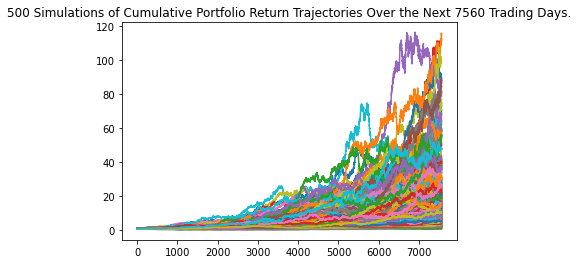

In [45]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

mc_sim_line_plot = mc_thirty.plot_simulation()

mc_sim_line_plot.get_figure().savefig("mc_thirty_sim_plot.png", bbox_inches="tight")


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

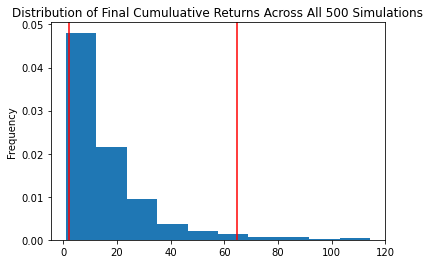

In [46]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

mc_sim_dist_plot = mc_thirty.plot_distribution()

mc_sim_dist_plot.get_figure().savefig('mc_thirty_dist_plot.png', bbox_inches = 'tight')


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [47]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

mc_summary_statistics = mc_thirty.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

print(mc_summary_statistics)


count           500.000000
mean             16.645953
std              16.574273
min               0.873968
25%               6.238739
50%              10.922178
75%              21.267361
max             114.420119
95% CI Lower      2.200360
95% CI Upper     64.843375
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [48]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

total_stock_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE

total_stock_bonds.head()


timestamp
2020-08-07 04:00:00+00:00    60688.7
2020-08-10 04:00:00+00:00    60776.7
2020-08-11 04:00:00+00:00    60406.0
2020-08-12 04:00:00+00:00    60868.4
2020-08-13 04:00:00+00:00    60713.3
Name: close, dtype: float64

In [49]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# ci_lower_thirty_cumulative_return = # YOUR CODE HERE
# ci_upper_thirty_cumulative_return = # YOUR CODE HERE

ci_lower_thirty_cumulative_return = mc_summary_statistics[8] * 10000
ci_upper_thirty_cumulative_return = mc_summary_statistics[9] * 10000


# Print the result of your calculations
# YOUR CODE HERE

print(f'There is a 95% chance that an initial investment of $10,000 in the portfolio'
      f' over the next 30 years will end within the range of'
      f'${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.')




There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 30 years will end within the range of$ 22003.60 and $ 648433.75.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [50]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE

mc_ten = MCSimulation(portfolio_data = portfolio_2_combined,weights = [.80,.20],num_simulation = 500,num_trading_days = 252*10)


# Review the simulation input data
# YOUR CODE HERE

mc_ten.portfolio_data.head()



SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2018-08-07 04:00:00+00:00  285.40  286.010  285.240  285.58  43427090   
2018-08-08 04:00:00+00:00  285.39  285.910  284.940  285.46  42273966   
2018-08-09 04:00:00+00:00  285.54  285.970  284.915  285.07  37130583   
2018-08-10 04:00:00+00:00  283.42  284.055  282.360  283.16  77399449   
2018-08-13 04:00:00+00:00  283.49  284.160  281.770  282.10  65970064   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-08-07 04:00:00+00:00      181015  285.635439          NaN  105.97   
2018-08-08 04:00:00+00:00      154349  285.479104    -0.000420  105.83   
2018-08-09 04:00:00+00:00      140980  285.455348    -0.001366  105.97   
2018-08-10 04:00:00+00:00      292690  283.350560    -0.006700  106.11   
2018-08-13 04:00:00+00:00      270772  282.691061    -0.003743  106.16   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2018-08-07 04:00:00+00:00  105.97  105.8250  105.85  2532774        9522   
2018-08-08 04:00:00+00:00  105.91  105.8000  105.85  1937527        9394   
2018-08-09 04:00:00+00:00  106.04  105.9329  106.00  2386756       10063   
2018-08-10 04:00:00+00:00  106.36  106.1100  106.23  4136487       12317   
2018-08-13 04:00:00+00:00  106.30  106.1501  106.29  2786308       13888   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-08-07 04:00:00+00:00  105.876672          NaN  
2018-08-08 04:00:00+00:00  105.848006     0.000000  
2018-08-09 04:00:00+00:00  105.993103     0.001417  
2018-08-10 04:00:00+00:00  106.238745     0.002170  
2018-08-13 04:00:00+00:00  106.241962     0.000565

In [51]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE

mc_ten.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/theo/Desktop/Local_Workspace/TRG_Challenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.976430,0.976249,0.987703,1.005746,1.004950,1.007615,0.988504,0.992902,0.995023,0.986635,...,1.001242,1.024603,0.977381,0.997990,0.996944,0.993688,1.002356,1.002368,1.024184,1.007779
2,0.970476,0.962251,0.996350,1.019321,1.007792,1.012625,0.989880,1.005262,0.995412,1.005629,...,1.015978,1.000989,0.981025,1.007742,0.986483,1.000084,0.985631,1.004019,1.040661,1.003260
3,0.984335,0.961555,0.991133,1.043563,1.010934,1.005384,1.029638,0.991850,0.993297,1.005554,...,1.012015,1.011398,0.998539,1.012864,0.986831,0.998459,1.003386,0.995598,1.056527,1.002032
4,0.987012,0.971760,1.000229,1.035859,1.005585,0.992295,1.019705,1.007739,0.998681,0.986617,...,1.002859,1.000562,1.000912,1.024252,0.980208,1.017871,0.999089,0.989153,1.083616,0.995719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.911814,2.546564,1.363603,0.715080,2.155224,1.027735,3.855883,3.092073,4.013212,1.978422,...,2.522281,3.838494,13.765238,2.463399,2.360731,2.330326,3.261656,7.222971,3.365483,3.547699
2517,2.867336,2.588145,1.361434,0.704872,2.150537,1.038295,3.900511,3.132073,4.013737,1.981227,...,2.511968,3.864914,13.697506,2.411040,2.357020,2.324190,3.216896,7.157727,3.345281,3.577509
2518,2.768823,2.640428,1.360672,0.689724,2.165280,1.037396,3.946161,3.098212,4.002385,1.983989,...,2.543081,3.904234,13.508335,2.376218,2.384420,2.273723,3.228923,7.369378,3.362154,3.645284
2519,2.790116,2.593867,1.354241,0.684849,2.197351,1.057711,3.986337,3.089498,4.053263,1.977847,...,2.495850,3.960487,13.558599,2.322653,2.429770,2.309559,3.242722,7.440042,3.454674,3.749805


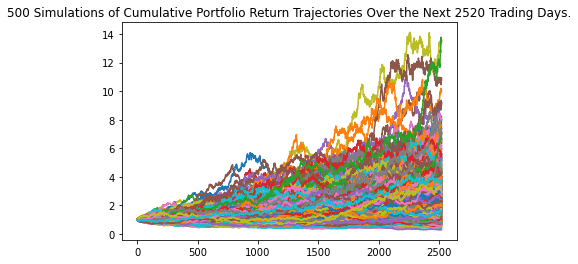

In [52]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

mc_sim_line_plot = mc_ten.plot_simulation()

mc_sim_line_plot.get_figure().savefig("mc_thirty_sim_plot.png", bbox_inches="tight")


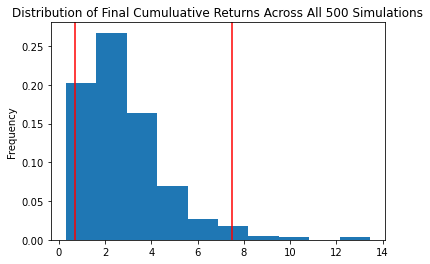

In [53]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

mc_sim_dist_plot = mc_ten.plot_distribution()

mc_sim_dist_plot.get_figure().savefig('mc_thirty_dist_plot.png', bbox_inches = 'tight')


In [54]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE


mc_summary_statistics = mc_ten.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

print(mc_summary_statistics)


count           500.000000
mean              2.822545
std               1.847650
min               0.296925
25%               1.553332
50%               2.374047
75%               3.586443
max              13.461353
95% CI Lower      0.674753
95% CI Upper      7.499804
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [55]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

total_stock_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE

total_stock_bonds.head()


timestamp
2020-08-07 04:00:00+00:00    60688.7
2020-08-10 04:00:00+00:00    60776.7
2020-08-11 04:00:00+00:00    60406.0
2020-08-12 04:00:00+00:00    60868.4
2020-08-13 04:00:00+00:00    60713.3
Name: close, dtype: float64

In [56]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# ci_lower_ten_cumulative_return = # YOUR CODE HERE
# ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE

ci_lower_ten_cumulative_return = mc_summary_statistics[8] * 10000
ci_upper_ten_cumulative_return = mc_summary_statistics[9] * 10000


# Print the result of your calculations
# YOUR CODE HERE

print(f'There is a 95% chance that an initial investment of $10,000 in the portfolio'
      f' over the next 10 years will end within the range of'
      f'${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.')


There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within the range of$ 6747.53 and $ 74998.04.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [57]:
# If they realize the 95% high assumption, they should be able to retire in 10 years. 